In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import date

In [93]:
c_to_f = lambda c :(9/5)*c + 32

In [94]:
#read in .xls to df
df=pd.read_excel("TrinidadBeach_TEMP_1975-20230622.xls") #change excel filename
df = df[47:].reset_index().drop('index',axis=1)
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])
df = df.rename(columns={'==================================================================================': 'year',
                        'Unnamed: 1': 'month',
                        'Unnamed: 2': 'day',
                        'Unnamed: 5': 'sst'})
df['date'] = pd.to_datetime(df[['year','month','day']])
df

,year,month,day,sst,date
0,1975,1,3,8,1975-01-03
1,1975,1,4,8.4,1975-01-04
2,1975,1,5,8.3,1975-01-05
3,1975,1,6,7.9,1975-01-06
4,1975,1,7,7.7,1975-01-07
...,...,...,...,...,...
17676,2023,5,27,NaN,2023-05-27
17677,2023,5,28,NaN,2023-05-28
17678,2023,5,29,NaN,2023-05-29
17679,2023,5,30,12.8,2023-05-30


In [103]:
#make annual climatology and long-term mean
climatology = df.groupby(['year']).mean().reset_index()
long_term_mean = df.sst.mean()
X = climatology.year.values.reshape(-1,1)
Y = climatology.sst.values.reshape(-1,1)
lm = LinearRegression()  # create object for the class
lm.fit(X,Y)  # perform linear regression
century_trend = (lm.coef_[0] * 100)[0]

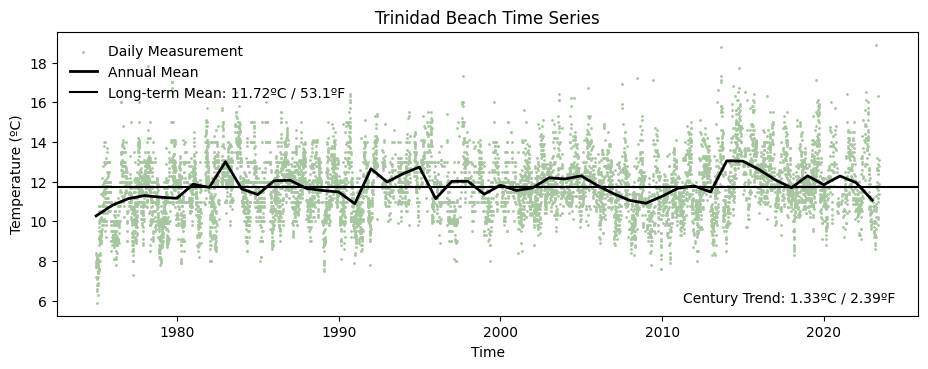

In [127]:
#plot
width = 11.11
height = 3.688
plt.figure(figsize=(width,height))
scatter_color = (171/265,206/265,165/265)
plt.scatter(df.date,df.sst,s=1,color=scatter_color)
plt.plot(df.groupby('year')['date'].first(), climatology.sst, color='k',linewidth=2)
plt.axhline(y=long_term_mean,c='k')
plt.xlabel('Time')
plt.ylabel('Temperature (ºC)')
location = 'Trinidad Beach Time Series' #TODO unhardcode when functionified
plt.title(location)

long_term_mean_str = 'Long-term Mean: ' + str(np.round(long_term_mean, 2)) + 'ºC / ' + str(np.round(c_to_f(long_term_mean), 2)) +'ºF'
trend_label = 'Century Trend: ' + str(np.round(century_trend,2)) + 'ºC / ' + str(np.round((9/5)*century_trend,2)) + 'ºF'
plt.text(df.date[round(len(df)*0.75)],df.sst.min(),trend_label)
plt.legend(['Daily Measurement','Annual Mean',long_term_mean_str], frameon = False)
plt.savefig('trinidad_beach_time_series.png')
